In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [5]:
accidents_vehicles= pd.read_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_vehicles.csv")

### Create a dictionary with the translations needed from catalan to english

In [18]:
# Load your dataset
file_path = "/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_vehicles.csv"
accidents_vehicles = pd.read_csv(file_path)

# Define translations
translation_dict = {
    
    "Conductor": "Driver", 'Vianant': 'Pedestrian', 'Passatger': 'Passenger', 'En pas regulat per semŕfor': 'In crossing regulated by traffic lights',
    "Dilluns": "Monday", "Dimarts": "Tuesday", "Dimecres": "Wednesday",
    "Dijous": "Thursday", "Divendres": "Friday", "Dissabte": "Saturday", "Diumenge": "Sunday",
    "Gener": "January", "Febrer": "February", "Març": "March", "Abril": "April",
    "Maig": "May", "Juny": "June", "Juliol": "July", "Agost": "August",
    "Setembre": "September", "Octubre": "October", "Novembre": "November", "Desembre": "December",
    "Il.lčs": "Uninjured",
     "No és causa del vianant": "Not caused by the pedestrian",
    "Creuar per fora pas de vianants": "Crossing outside the pedestrian crossing",
    "Transitar a peu per la calçada": "Walking on the road",
    "Desobeir el senyal del semàfor": "Disobeying the traffic light signal",
    "Altres": "Others",
    "Desobeir altres senyals": "Disobeying other signals",
    "Es desconeix": "Unknown", "Desconegut": "Unknown", "Altres": "Others",
    "Taxi": "Taxi", "Turisme": "Car", "Motocicleta": "Motorcycle",  "Autobús articulat": "Articulated bus",
    "Bicicleta": "Bicycle",
    "Veh. mobilitat personal amb motor": "Motorized personal mobility vehicle",
    "Camió rígid <= 3,5 tones": "Rigid truck <= 3.5 tons",
    "Furgoneta": "Van",
    "Ciclomotor": "Moped",
    "Tot terreny": "All-terrain vehicle",
    "Maquinària d'obres i serveis": "Construction and service machinery",
    "Camió rígid > 3,5 tones": "Rigid truck > 3.5 tons",
    "Taxi": "Taxi",
    "Ambulància": "Ambulance",
    "Tricicle": "Tricycle",
    "Unknown": "Unknown",
    "Autocaravana": "Motorhome",
    "Autocar": "Coach",
    "Tractor camió": "Tractor truck",
    "Altres vehicles amb motor": "Other motorized vehicles",
    "Veh. mobilitat personal sense motor": "Non-motorized personal mobility vehicle",
    "Pick-up": "Pick-up",
    "Quadricicle < 75 cc": "Quadricycle < 75 cc",
    "Altres vehicles sense motor": "Other non-motorized vehicles",
    "Tren o tramvia": "Train or tram",
    "Quadricicle > 75 cc": "Quadricycle > 75 cc", 'Blau': 'Blue',
    'Taronja': 'Orange',
    'Marró': 'Brown',
    'Verd': 'Green',
    'Negre/Groc': 'Black/Yellow',
    'Daurat': 'Golden',
    'Platejat': 'Silver',
    'Violeta': 'Violet',
    'Groc': 'Yellow',
    'Beige': 'Beige',
    'Rosa': 'Pink'
}
# Apply the translations
accidents_vehicles.replace(translation_dict, inplace=True)
# Save the translated dataset
output_path = "/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_vehicles.csv"
accidents_vehicles.to_csv(output_path, index=False)
print(f"Translated dataset saved to {output_path}")

Translated dataset saved to /Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_vehicles.csv


### Check the table, what I need and what I dont need, understand the information I have

In [19]:
accidents_vehicles.head()

,Case_Number,District_Code,District_Name,Neighborhood_Code,Neighborhood_Name,Street_Code,Street_Name,Postal_Code,Day_of_Week,Year,...,Vehicle_Type_Description,Vehicle_Model_Description,Vehicle_Brand_Description,Vehicle_Color_Description,License_Description,License_Age,UTM_X_Coordinate,UTM_Y_Coordinate,Longitude,Latitude
0,2023S000536,-1,Unknown,-1,Unknown,-1,Motors / Acer ...,NaN,Thursday,2023,...,Car,ASTRA,OPEL,granate,Unknown,Unknown,428118.93,4578054.77,2.139637367,41.348935697
1,2023S000506,-1,Unknown,-1,Unknown,-1,Motors ...,152-154,Thursday,2023,...,Motorcycle,FSH125,HONDA,Gray,B,11,428888.97,4578390.79,2.148801757,41.352030518
2,2023S000506,-1,Unknown,-1,Unknown,-1,NaN,NaN,Thursday,2023,...,Car,XCEED,KIA,White,B,39,428888.97,4578390.79,2.148801757,41.352030518
3,2023S001678,-1,Unknown,-1,Unknown,-1,Corts / Arístides Maillol ...,NaN,Thursday,2023,...,Bus,LION'S CITY G,MAN,Red,D,17,426626.85,4581292.09,2.121411776,41.377958412
4,2023S002486,-1,Unknown,-1,Unknown,-1,Glòries Catalanes ...,1,Thursday,2023,...,Articulated bus,HYBRID H18,SOLARIS,Red,E D,26,432052.4,4583910.53,2.185995092,41.402018695


In [20]:
accidents_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14361 entries, 0 to 14360
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Case_Number                   14357 non-null  object
 1   District_Code                 14361 non-null  int64 
 2   District_Name                 14361 non-null  object
 3   Neighborhood_Code             14361 non-null  int64 
 4   Neighborhood_Name             14361 non-null  object
 5   Street_Code                   14361 non-null  int64 
 6   Street_Name                   14290 non-null  object
 7   Postal_Code                   14257 non-null  object
 8   Day_of_Week                   14361 non-null  object
 9   Year                          14361 non-null  int64 
 10  Month_Code                    14361 non-null  int64 
 11  Month_Name                    14361 non-null  object
 12  Day_of_Month                  14361 non-null  int64 
 13  Hour_of_Day     

### Drop columns that I dont need 

In [21]:
columns_to_drop = ['District_Code', 'Neighborhood_Code', 'Street_Code', 'Postal_Code']
columns_existing = [col for col in columns_to_drop if col in accidents_vehicles.columns]
accidents_vehicles = accidents_vehicles.drop(columns=columns_existing, inplace=False)

# Display the first few rows
print(accidents_vehicles.head())

       Case_Number District_Name Neighborhood_Name  \
0  2023S000536           Unknown           Unknown   
1  2023S000506           Unknown           Unknown   
2  2023S000506           Unknown           Unknown   
3  2023S001678           Unknown           Unknown   
4  2023S002486           Unknown           Unknown   

                                         Street_Name Day_of_Week  Year  \
0  Motors / Acer                                 ...    Thursday  2023   
1  Motors                                        ...    Thursday  2023   
2                                                NaN    Thursday  2023   
3  Corts / Arístides Maillol                     ...    Thursday  2023   
4  Glòries Catalanes                             ...    Thursday  2023   

   Month_Code Month_Name  Day_of_Month  Hour_of_Day  ...  \
0           1    January            26           14  ...   
1           1    January            26           15  ...   
2           1    January            26           1

### Check for null values and sum them

In [22]:
accidents_vehicles.isnull().sum()


Case_Number                      4
District_Name                    0
Neighborhood_Name                0
Street_Name                     71
Day_of_Week                      0
Year                             0
Month_Code                       0
Month_Name                       0
Day_of_Month                     0
Hour_of_Day                      0
Shift_Description                0
Pedestrian_Cause_Description     0
Vehicle_Type_Description         4
Vehicle_Model_Description        4
Vehicle_Brand_Description        4
Vehicle_Color_Description        4
License_Description              4
License_Age                      4
UTM_X_Coordinate                 0
UTM_Y_Coordinate                 0
Longitude                        0
Latitude                         0
dtype: int64

### Drop nan values and duplicates

In [23]:
accidents_vehicles = accidents_vehicles.dropna()


In [24]:
accidents_vehicles = accidents_vehicles.drop_duplicates()


### Create new column with datetime

In [37]:
accidents_vehicles['datetime'] = pd.to_datetime({
    'year': accidents_vehicles['Year'],
    'month': accidents_vehicles['Month_Code'],
    'day': accidents_vehicles['Day_of_Month']
}) + pd.to_timedelta(accidents_vehicles['Hour_of_Day'], unit='h')

print(accidents_vehicles[['datetime']].head())

             datetime
0 2023-01-26 14:00:00
1 2023-01-26 15:00:00
3 2023-03-23 14:00:00
4 2023-04-27 20:00:00
6 2023-05-11 18:00:00


### Re-check the table

In [26]:
accidents_vehicles.head()

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Year,Month_Code,Month_Name,Day_of_Month,Hour_of_Day,...,Vehicle_Model_Description,Vehicle_Brand_Description,Vehicle_Color_Description,License_Description,License_Age,UTM_X_Coordinate,UTM_Y_Coordinate,Longitude,Latitude,datetime
0,2023S000536,Unknown,Unknown,Motors / Acer ...,Thursday,2023,1,January,26,14,...,ASTRA,OPEL,granate,Unknown,Unknown,428118.93,4578054.77,2.139637367,41.348935697,2023-01-26 14:00:00
1,2023S000506,Unknown,Unknown,Motors ...,Thursday,2023,1,January,26,15,...,FSH125,HONDA,Gray,B,11,428888.97,4578390.79,2.148801757,41.352030518,2023-01-26 15:00:00
3,2023S001678,Unknown,Unknown,Corts / Arístides Maillol ...,Thursday,2023,3,March,23,14,...,LION'S CITY G,MAN,Red,D,17,426626.85,4581292.09,2.121411776,41.377958412,2023-03-23 14:00:00
4,2023S002486,Unknown,Unknown,Glòries Catalanes ...,Thursday,2023,4,April,27,20,...,HYBRID H18,SOLARIS,Red,E D,26,432052.4,4583910.53,2.185995092,41.402018695,2023-04-27 20:00:00
6,2023S002816,Unknown,Unknown,Motors ...,Thursday,2023,5,May,11,18,...,SH 300,HONDA,Black,A,12,427994.28,4577969.06,2.138157684,41.348152595,2023-05-11 18:00:00


### Re-check vehicle color is in english

In [27]:
accidents_vehicles['Vehicle_Color_Description'].unique()


array(['granate', 'Gray', 'Red', 'Black', 'White', 'Unknown', 'Others',
       'Blue', 'Orange', 'Brown', 'Green', 'Black/Yellow', 'Golden',
       'Silver', 'Violet', 'Yellow', 'Beige', 'Pink'], dtype=object)

### Check for the unique values in the table

In [29]:
for column in accidents_vehicles.columns:
    unique_values = accidents_vehicles[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in column 'Case_Number':
['2023S000536    ' '2023S000506    ' '2023S001678    ' ...
 '2023S003149    ' '2023S000552    ' '2023S001127    ']
--------------------------------------------------
Unique values in column 'District_Name':
['Unknown' 'Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']
--------------------------------------------------
Unique values in column 'Neighborhood_Name':
['Unknown' 'el Raval' 'el Barri Gòtic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Família' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble-sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafrancs' 'la Bordeta'
 'Sants - Badal' 'Sants' 'les Corts' 'la Maternitat i Sant Ramon'
 'Pedralbes' 'Vallvidrera, el Tibidabo i les Planes' 'Sarrià'
 'les Tres Tor

### Check for the unique values in street name

In [30]:
accidents_vehicles['Street_Name'].unique()


array(['Motors / Acer                                     ',
       'Motors                                            ',
       'Corts / Arístides Maillol                         ', ...,
       'Trajana', 'Verneda', 'Josep Miret'], dtype=object)

### Delete empty spaces in street_name

In [34]:
accidents_vehicles['Street_Name'] = (
    accidents_vehicles['Street_Name']
    .str.strip()  
)

### ...

In [39]:
accidents_vehicles

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Year,Month_Code,Month_Name,Day_of_Month,Hour_of_Day,...,Vehicle_Model_Description,Vehicle_Brand_Description,Vehicle_Color_Description,License_Description,License_Age,UTM_X_Coordinate,UTM_Y_Coordinate,Longitude,Latitude,datetime
0,2023S000536,Unknown,Unknown,Motors / Acer,Thursday,2023,1,January,26,14,...,ASTRA,OPEL,granate,Unknown,Unknown,428118.93,4578054.77,2.139637367,41.348935697,2023-01-26 14:00:00
1,2023S000506,Unknown,Unknown,Motors,Thursday,2023,1,January,26,15,...,FSH125,HONDA,Gray,B,11,428888.97,4578390.79,2.148801757,41.352030518,2023-01-26 15:00:00
3,2023S001678,Unknown,Unknown,Corts / Arístides Maillol,Thursday,2023,3,March,23,14,...,LION'S CITY G,MAN,Red,D,17,426626.85,4581292.09,2.121411776,41.377958412,2023-03-23 14:00:00
4,2023S002486,Unknown,Unknown,Glòries Catalanes,Thursday,2023,4,April,27,20,...,HYBRID H18,SOLARIS,Red,E D,26,432052.4,4583910.53,2.185995092,41.402018695,2023-04-27 20:00:00
6,2023S002816,Unknown,Unknown,Motors,Thursday,2023,5,May,11,18,...,SH 300,HONDA,Black,A,12,427994.28,4577969.06,2.138157684,41.348152595,2023-05-11 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14356,2023S003149,Sant Martí,la Verneda i la Pau,Verneda,Friday,2023,5,May,26,11,...,Unknown,IVECO FIAT,White,E C,4,433009.31,4586838.4,2.197117433,41.428469538,2023-05-26 11:00:00
14357,2023S000552,Sant Martí,la Verneda i la Pau,Verneda,Saturday,2023,1,January,28,18,...,,ES DESCONEIX,White,Unknown,Unknown,433722.46,4586795.27,2.205656494,41.428140273,2023-01-28 18:00:00
14358,2023S000552,Sant Martí,la Verneda i la Pau,Verneda,Saturday,2023,1,January,28,18,...,XS,JOYOR,Black,Unknown,Unknown,433722.46,4586795.27,2.205656494,41.428140273,2023-01-28 18:00:00
14359,2023S001127,Sant Martí,la Verneda i la Pau,Josep Miret,Friday,2023,2,February,24,21,...,LIBERTY 125,PIAGGIO,Black,B,12,433222.36,4586200.55,2.199737507,41.422742361,2023-02-24 21:00:00


In [ ]:
unique_values = accidents_vehicles['Involved_Vehicle_Type'].value_counts()

print(unique_values)

In [46]:
print(accidents_vehicles.dtypes)


Case_Number                             object
District_Name                           object
Neighborhood_Name                       object
Street_Name                             object
Day_of_Week                             object
Year                                     int64
Month_Code                               int64
Month_Name                              object
Day_of_Month                             int64
Hour_of_Day                              int64
Shift_Description                       object
Pedestrian_Cause_Description            object
Vehicle_Type_Description                object
Vehicle_Model_Description               object
Vehicle_Brand_Description               object
Vehicle_Color_Description               object
License_Description                     object
License_Age                             object
UTM_X_Coordinate                        object
UTM_Y_Coordinate                        object
Longitude                               object
Latitude     

### Save the clean data

In [38]:
accidents_vehicles.to_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023_accidents_vehicles_cleaned.csv", index=False)

# Visualizations

# Top color by day 

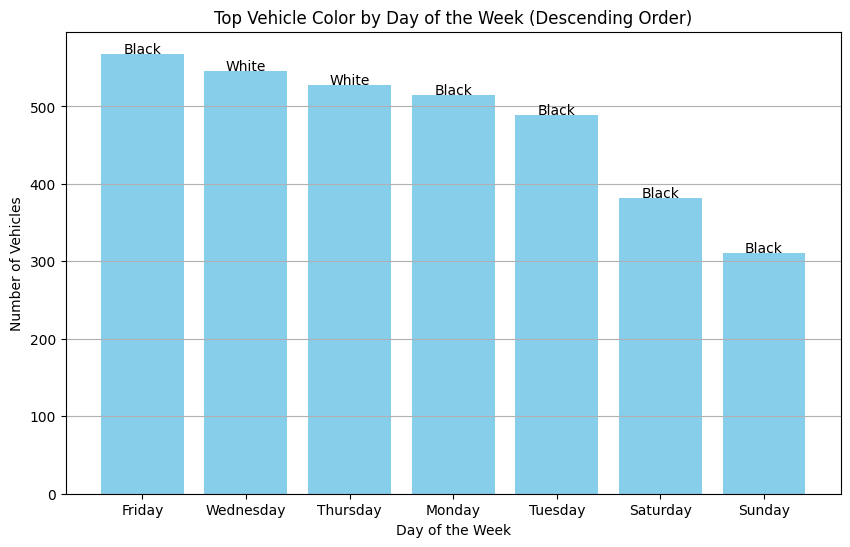

    Day_of_Week Vehicle_Color_Description  Count
0        Friday                     Black    568
112   Wednesday                     White    546
77     Thursday                     White    528
15       Monday                     Black    515
81      Tuesday                     Black    489
31     Saturday                     Black    382
48       Sunday                     Black    311


In [43]:
# Group data by 'Day_of_Week' and 'Vehicle_Color_Description'
color_by_day = accidents_vehicles.groupby(['Day_of_Week', 'Vehicle_Color_Description']).size().reset_index(name='Count')

# Find the top color for each day
top_color_by_day = color_by_day.loc[color_by_day.groupby('Day_of_Week')['Count'].idxmax()]

# Sort the results in descending order by 'Count'
top_color_by_day = top_color_by_day.sort_values(by='Count', ascending=False)

# Plot the top vehicle colors
plt.figure(figsize=(10, 6))
plt.bar(top_color_by_day['Day_of_Week'], top_color_by_day['Count'], color='skyblue')
for i, row in top_color_by_day.iterrows():
    plt.text(row['Day_of_Week'], row['Count'] + 1, row['Vehicle_Color_Description'], ha='center', fontsize=10)

# Add labels and title
plt.title('Top Vehicle Color by Day of the Week (Descending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y')
plt.show()

# Display the DataFrame for reference
print(top_color_by_day)



# Top 5 colors in general

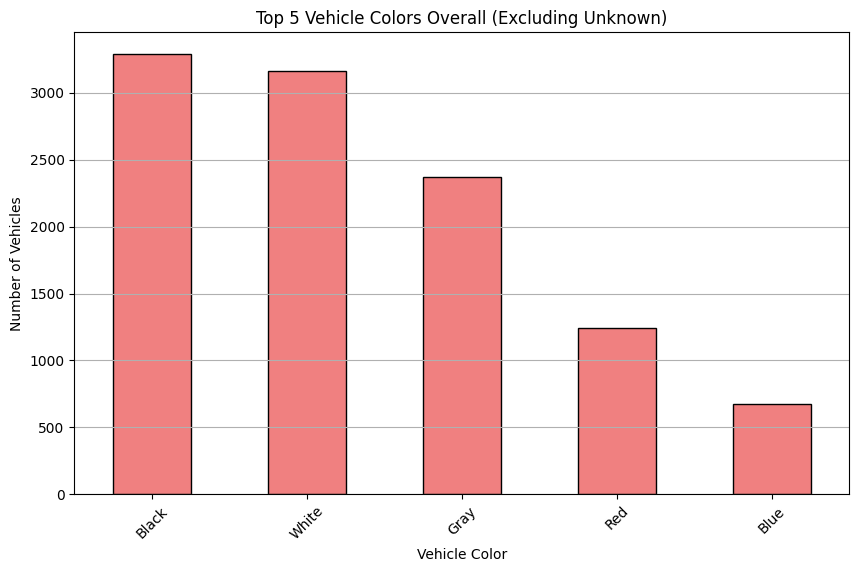

Top 5 Vehicle Colors Overall (Excluding Unknown):
Vehicle_Color_Description
Black    3288
White    3165
Gray     2374
Red      1239
Blue      675
Name: count, dtype: int64


In [45]:
top_5_colors = accidents_vehicles[accidents_vehicles['Vehicle_Color_Description'] != 'Unknown'][
    'Vehicle_Color_Description'].value_counts().head(5)

# Plot the top 5 colors
plt.figure(figsize=(10, 6))
top_5_colors.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 5 Vehicle Colors Overall (Excluding Unknown)')
plt.xlabel('Vehicle Color')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Print the top 5 vehicle colors
print("Top 5 Vehicle Colors Overall (Excluding Unknown):")
print(top_5_colors)

# Top vehicles involved in accidents 

### In general

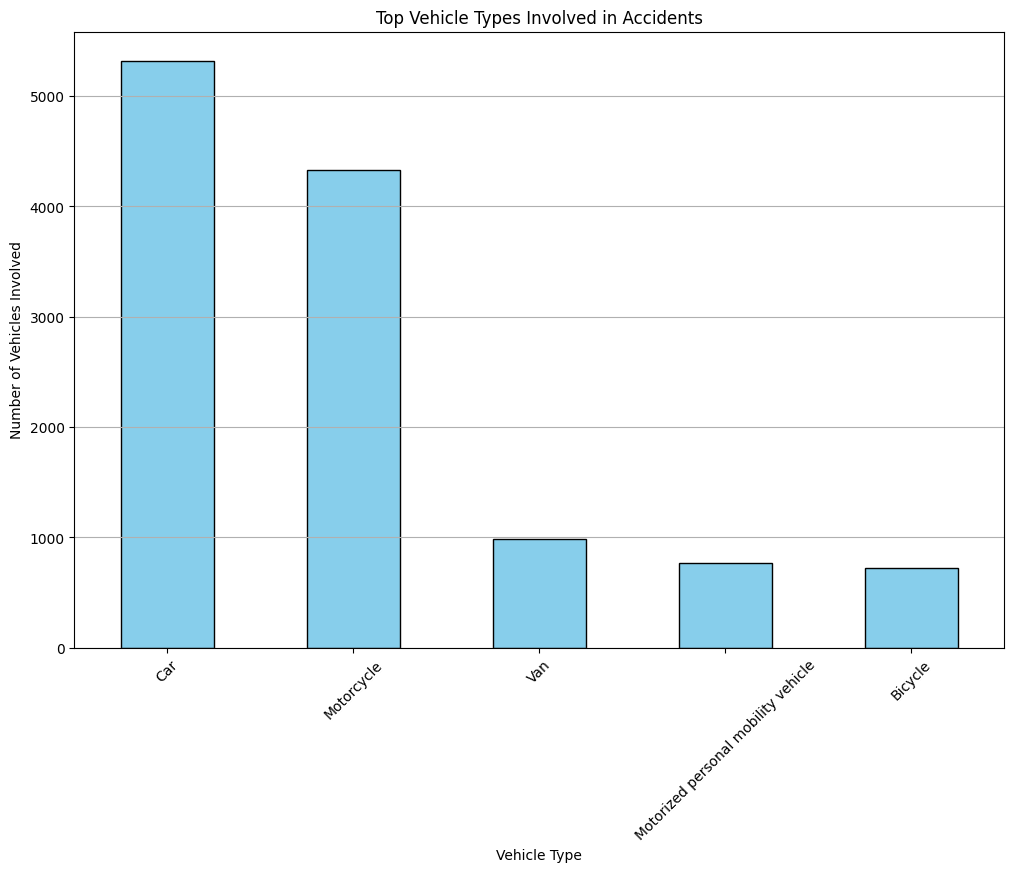

In [51]:
vehicle_type_distribution = accidents_vehicles['Vehicle_Type_Description'].value_counts().head(5)

# Plot the top 10 vehicle types
plt.figure(figsize=(12, 8))
vehicle_type_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles Involved')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



### By day

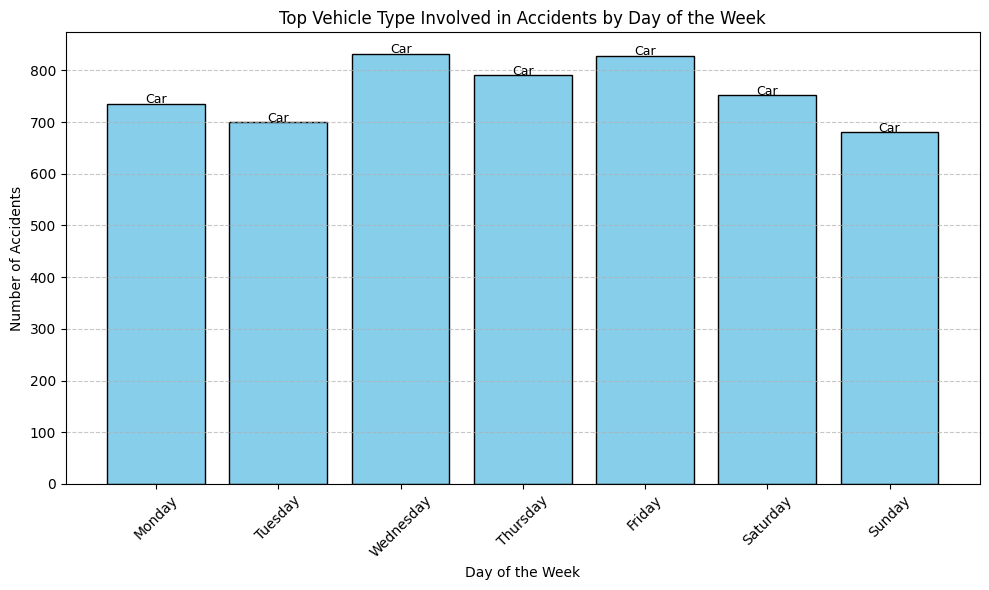

In [52]:
vehicle_by_day = accidents_vehicles.groupby(['Day_of_Week', 'Vehicle_Type_Description']).size().reset_index(name='Count')

# Find the top vehicle type for each day
top_vehicle_by_day = vehicle_by_day.loc[vehicle_by_day.groupby('Day_of_Week')['Count'].idxmax()]

# Sort days of the week for consistent ordering
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top_vehicle_by_day['Day_of_Week'] = pd.Categorical(top_vehicle_by_day['Day_of_Week'], categories=days_order, ordered=True)
top_vehicle_by_day = top_vehicle_by_day.sort_values('Day_of_Week')

# Plot the top vehicle types
plt.figure(figsize=(10, 6))
plt.bar(top_vehicle_by_day['Day_of_Week'], top_vehicle_by_day['Count'], color='skyblue', edgecolor='black')

# Add vehicle type labels above each bar
for index, row in top_vehicle_by_day.iterrows():
    plt.text(row['Day_of_Week'], row['Count'] + 1, row['Vehicle_Type_Description'], ha='center', fontsize=9)

# Add labels and title
plt.title('Top Vehicle Type Involved in Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### By month

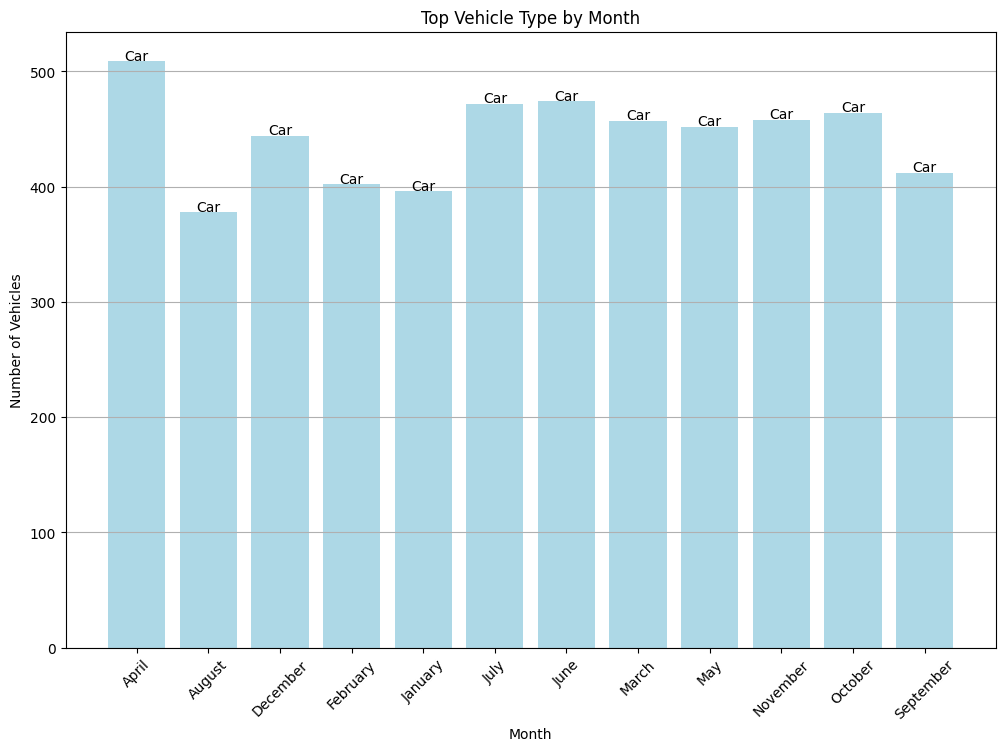

In [53]:
vehicle_type_by_month = accidents_vehicles.groupby(['Month_Name', 'Vehicle_Type_Description']).size().reset_index(name='Count')

# Find the top vehicle type for each month
top_vehicle_by_month = vehicle_type_by_month.loc[vehicle_type_by_month.groupby('Month_Name')['Count'].idxmax()]

# Plot the top vehicle types
plt.figure(figsize=(12, 8))
plt.bar(top_vehicle_by_month['Month_Name'], top_vehicle_by_month['Count'], color='lightblue')
for i, row in top_vehicle_by_month.iterrows():
    plt.text(row['Month_Name'], row['Count'] + 1, row['Vehicle_Type_Description'], ha='center', fontsize=10)

# Add labels and title
plt.title('Top Vehicle Type by Month')
plt.xlabel('Month')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Vehicle Brands and Models

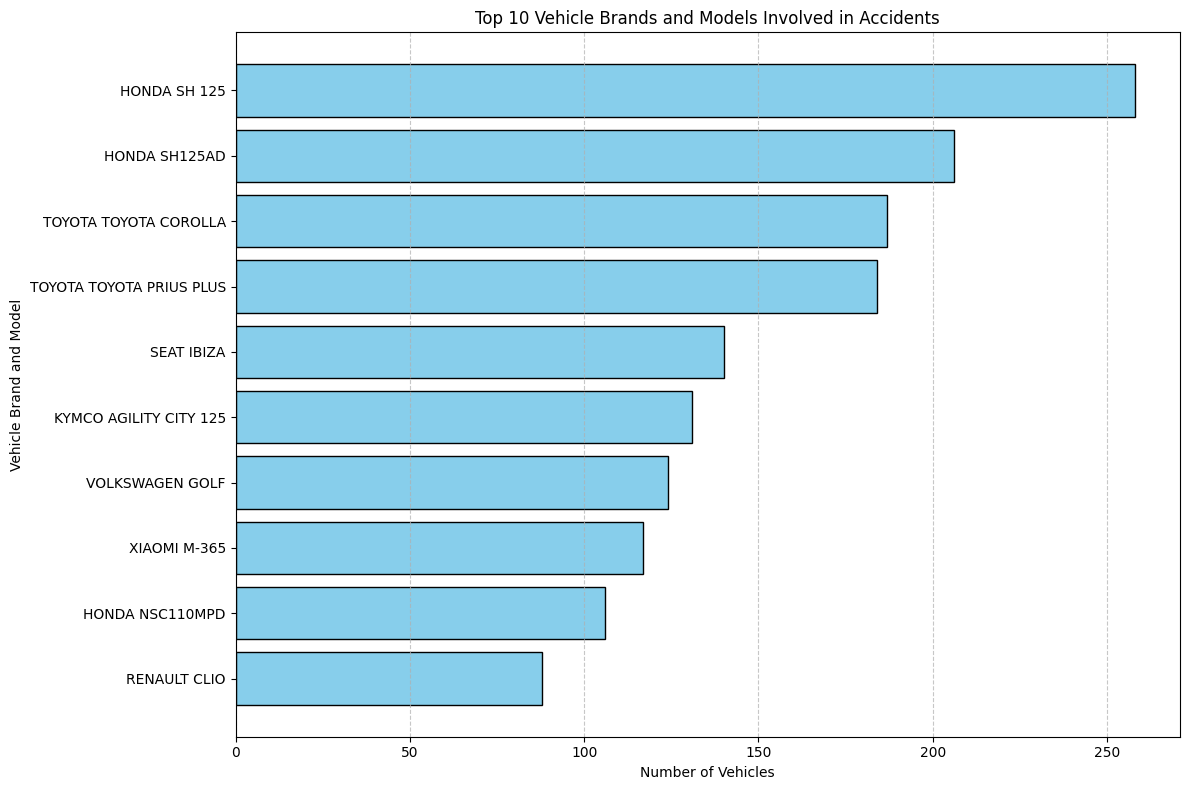

In [57]:
filtered_data = accidents_vehicles[
    (accidents_vehicles['Vehicle_Brand_Description'] != 'Unknown') &
    (accidents_vehicles['Vehicle_Model_Description'] != 'Unknown') &
    (accidents_vehicles['Vehicle_Brand_Description'] != 'ES DESCONEIX') &
    (accidents_vehicles['Vehicle_Model_Description'] != 'ES DESCONEIX')
]

# Count the occurrences of each vehicle brand and model
brand_model_counts = filtered_data.groupby(['Vehicle_Brand_Description', 'Vehicle_Model_Description']).size().reset_index(name='Count')

# Sort by count and select the top 10
top_10_brand_models = brand_model_counts.sort_values(by='Count', ascending=False).head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_brand_models['Vehicle_Brand_Description'] + " " + top_10_brand_models['Vehicle_Model_Description'], 
         top_10_brand_models['Count'], 
         color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top 10 Vehicle Brands and Models Involved in Accidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle Brand and Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# License Types

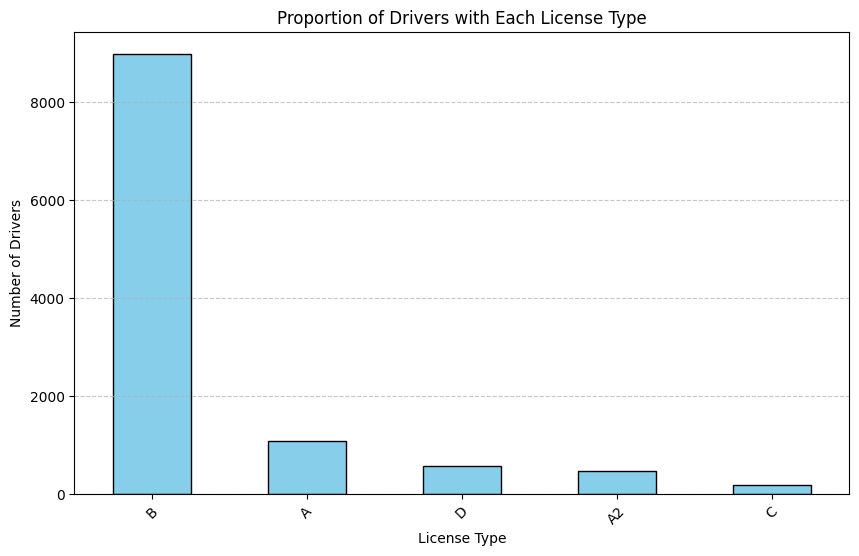

In [63]:
filtered_data = accidents_vehicles[(accidents_vehicles['License_Description'] != 'Unknown')]
license_type_counts = filtered_data['License_Description'].value_counts().head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
license_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Proportion of Drivers with Each License Type')
plt.xlabel('License Type')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# License Age Distribution

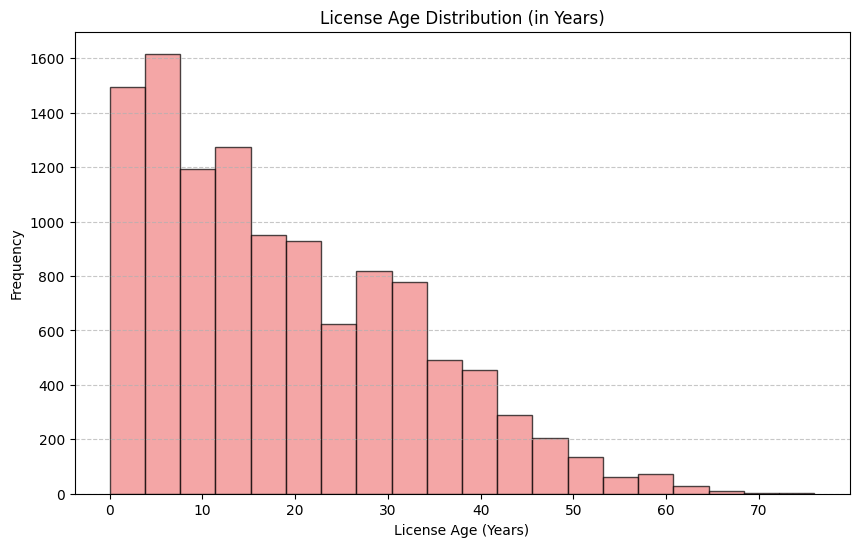

In [64]:
accidents_vehicles['License_Age'] = pd.to_numeric(accidents_vehicles['License_Age'], errors='coerce')

# Plot histogram of license ages
plt.figure(figsize=(10, 6))
accidents_vehicles['License_Age'].dropna().plot(kind='hist', bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('License Age Distribution (in Years)')
plt.xlabel('License Age (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# License Age by vehicle

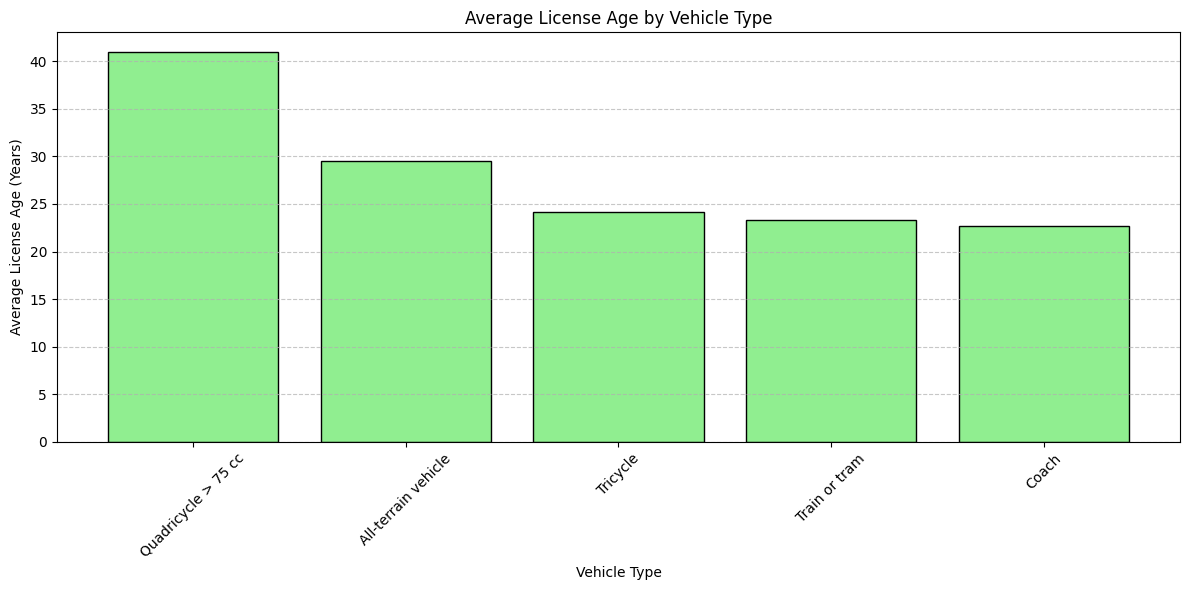

In [68]:
filtered_data = accidents_vehicles[(accidents_vehicles['Vehicle_Type_Description'] != 'Unknown')]
license_age_by_vehicle_type = (
    filtered_data.groupby('Vehicle_Type_Description')['License_Age']
    .mean()
    .dropna()
    .reset_index()
    .sort_values(by='License_Age', ascending=False).head(5)
)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    license_age_by_vehicle_type['Vehicle_Type_Description'], 
    license_age_by_vehicle_type['License_Age'], 
    color='lightgreen', edgecolor='black'
)
plt.title('Average License Age by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average License Age (Years)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# License Age Distribution by ranges

/var/folders/2b/p_02_vw56dz2qcq7yt8y1xh40000gn/T/ipykernel_34482/2591703195.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=license_age_counts.index, y=license_age_counts.values, palette="Blues")


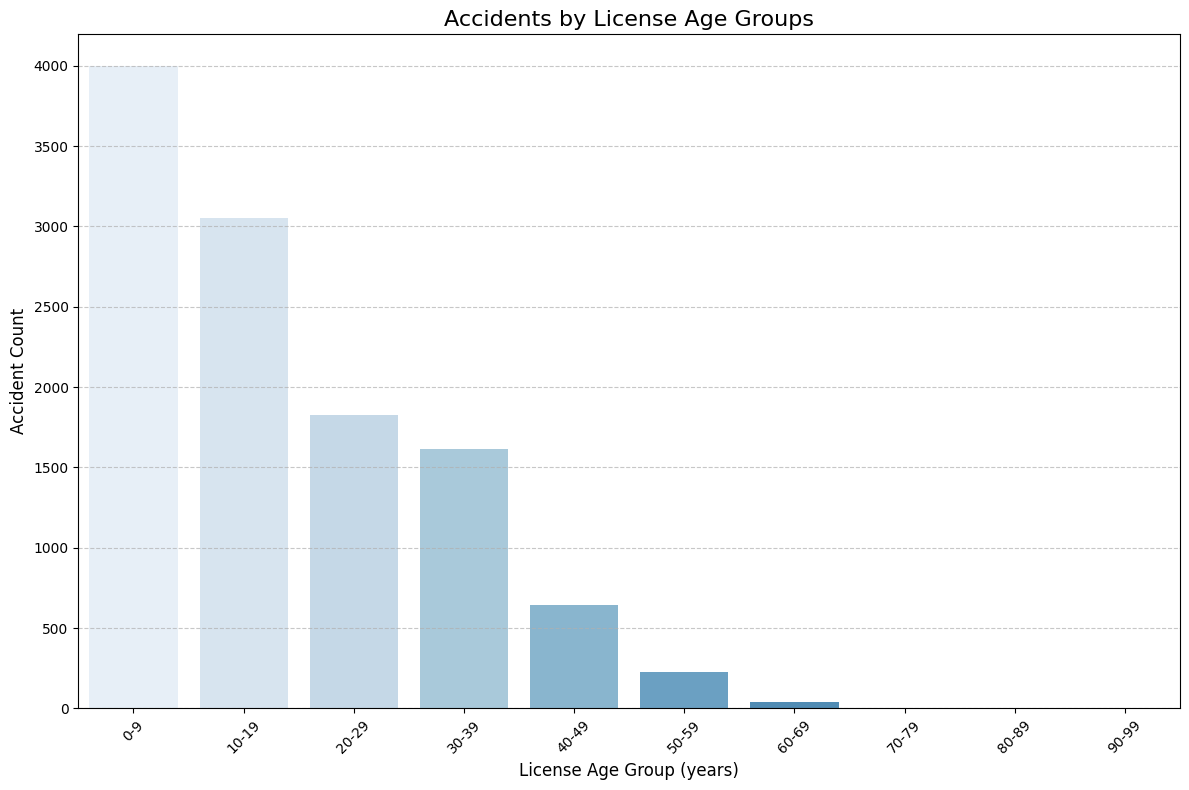

In [69]:
accidents_vehicles['License_Age'] = pd.to_numeric(accidents_vehicles['License_Age'], errors='coerce')
valid_license_age = accidents_vehicles['License_Age'].dropna()

# Create bins for age ranges
bins = list(range(0, 101, 10))  # 0-10, 11-20, ..., 91-100
labels = [f"{b}-{b+9}" for b in bins[:-1]]  # Label bins as "0-9", "10-19", etc.
accidents_vehicles['License_Age_Binned'] = pd.cut(accidents_vehicles['License_Age'], bins=bins, labels=labels)

# Count occurrences for each bin
license_age_counts = accidents_vehicles['License_Age_Binned'].value_counts().sort_index()

# Plot histogram with bins
plt.figure(figsize=(12, 8))
sns.barplot(x=license_age_counts.index, y=license_age_counts.values, palette="Blues")

# Customize the plot
plt.title('Accidents by License Age Groups', fontsize=16)
plt.xlabel('License Age Group (years)', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()